<a href="https://colab.research.google.com/github/bonsoul/Customer-Churn-Retention-Prediction---ML/blob/main/Customer_Churn_Retention_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer /Churn Retention Forecasting**


The **Customer Churn Prediction** project aims to identify customers who are likely to stop using a company’s services or products. By leveraging machine learning algorithms, the project analyzes historical customer data—such as demographics, usage patterns, and engagement history—to uncover patterns that signal churn. The model is trained on this data to classify whether a customer is likely to churn or remain loyal.

The project involves data preprocessing, feature engineering, and applying machine learning models such as logistic regression, decision trees, random forests, or gradient boosting to predict churn.

This helps the business implement targeted retention strategies, reducing customer loss and improving overall profitability.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 378kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
try:
  data = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')
  print(data.head())
except FileNotFoundError:
  print(f"Error: File not found in the specified path: {path}")
except Exception as e:
  print(f"An error occurred: {e}")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Data Preprocessing


data.shape

(7043, 21)

In [6]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#check duplicates
data.duplicated().sum()

0

In [10]:
data['TotalCharges'].dtype

dtype('O')

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
data['TotalCharges'].dtype

dtype('float64')

In [13]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable 'Churn' from the features list
if 'Churn' in categorical_features:
  categorical_features.remove('Churn')
elif 'Churn' in numerical_features:
  numerical_features.remove('Churn')

# Assuming 'church' is the target variable, but 'Churn' is present in the data
# If 'church' is actually a feature in your dataset, adjust the code accordingly
target = 'Churn'

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)

print("\nTarget variable:")
print(target)

Categorical features:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical features:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Target variable:
Churn


In [14]:
data.skew(numeric_only=True)

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524
TotalCharges,0.961642


In [15]:
data.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


## Feature Distiribution

In [16]:
data[numerical_features].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
# prompt: Drop seniorcitizen from numerical features

# Assuming 'numerical_features' is defined as in the previous code

if 'SeniorCitizen' in numerical_features:
  numerical_features.remove('SeniorCitizen')

print("\nNumerical features (after removing SeniorCitizen):")
print(numerical_features)


Numerical features (after removing SeniorCitizen):
['tenure', 'MonthlyCharges', 'TotalCharges']


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

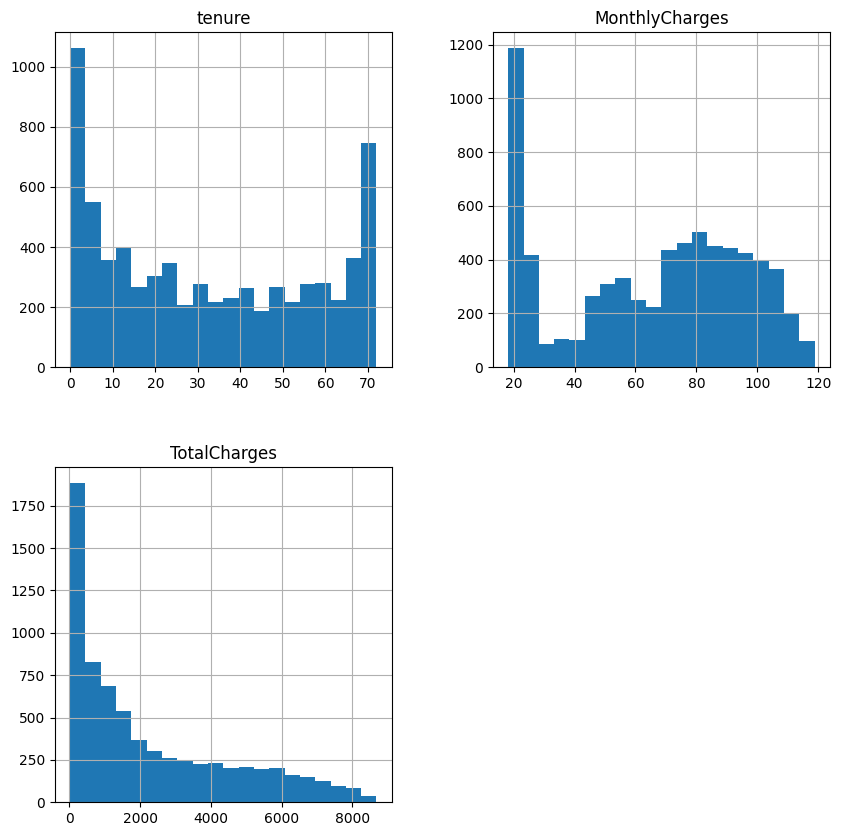

In [27]:
data[numerical_features].hist(figsize=(10,10), bins=20)

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

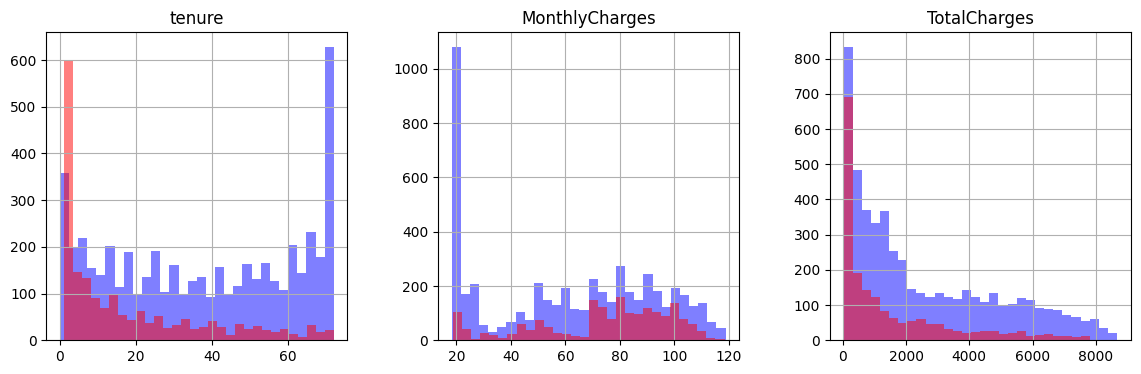

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(14,4))

data[data.Churn == 'No'][numerical_features].hist(bins=30,color='blue', alpha=0.5, ax=ax)
data[data.Churn == 'Yes'][numerical_features].hist(bins=30,color='red', alpha=0.5, ax=ax)

Categorical Feature Distribution

In [ ]:
ROWS, COLS = 3,4

fig, ax = plt.subplots(ROWS, COLS, figsize=(19,19))

row,col = 0,0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
      row += 1
    col = i % COLS
    data[categorical_feature].value_counts().plot(kind='bar')